# Polynomial Regression

Polynomial regression is an extension of linear regression used to model relationships between variables that are not linear. It involves fitting a polynomial equation to the data, allowing for curves and bends in the relationship. The equation includes higher-order terms of the independent variable, enabling a more flexible fit to the data points. This approach can better capture complex patterns in the data, but choosing the right degree of the polynomial is crucial to avoid overfitting.

**Importing Libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Importing Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Getting Features And Labels**

In [3]:
# Features
X = df.drop('sales', axis=1)

# Labels
y = df['sales']

**Applying Polynomial Regression**

In [8]:
# Converting the data to polynomial features
# Degree means to which polynomial degree do we want to map the features. 

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fitting the features to the converter
polynomial_converter.fit(X)

# Transforming the data
poly_features = polynomial_converter.transform(X)

**Comparing The Data**

In [9]:
# Getting the first row of the original features
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
# Getting the first row of the polynomial features
poly_features[0]

# If we see, the data has been converted to polynomial features. The first three entries

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

# Training And Evaluation

**Performing Train-Test Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [18]:
# Now that we have converted the data to polynomial nature, it must be in some sort of
# linear shape, so we can apply linear regression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [20]:
test_predictions = model.predict(X_test)

model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

**Testing The Predictions**

In [23]:
# Calculate metrics to evaluate the model
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Since the R-squared score is 0.98 i.e. 98%, our model is working very well.

Mean Squared Error: 0.5231944949055299
R-squared: 0.9808386009966378


**Choosing The Degree Of Polynomial**

We can do this by running a loop and inside it, trying different polynomial values. We'll then see the trend in a graph and choose the optimal polynomial value.

In [28]:
train_rmse_errors=[]
test_rmse_errors=[]

for i in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

**Plot**

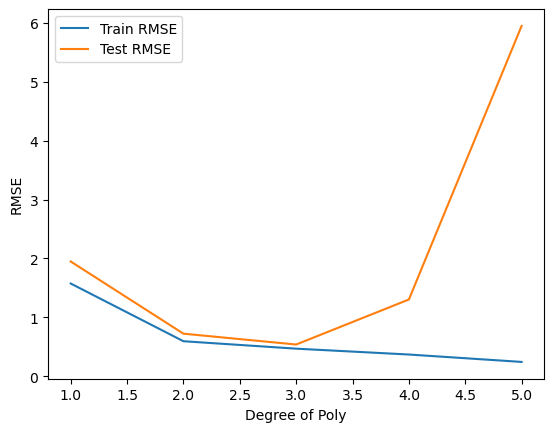

In [29]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()